In [ ]:
import os
fl = os.listdir('res')
fl

['Auction_master_test.csv',
 'Auction_master_train.csv',
 'Auction_regist.csv',
 'Auction_rent.csv',
 'Auction_result.csv',
 'Auction_submission.csv']

[데이터 설명]


한국의 서울과 부산 지역 약 2,700여개 최근 2년간 아파트 경매물의 등기부, 임차, 감정가, 유찰 횟수, 낙찰가 등의 정보가 제공됩니다. 아파트 낙찰가를 예측해야 합니다. 

* 국토교통부 실거래가공개시스템(http://rt.molit.go.kr) 등 법적인 제약이 없는 외부 데이터(공공 데이터) 사용이 가능합니다.


1. Auction_master_train.csv – 서울/부산 지역의 낙찰가를 포함하여 경매 물건 아파트의 위치, 감정가, 경매 개시/종결일 등의 기본 정보(*최근2년)
2. Auction_master_test.csv – 경매 낙찰가를 제외하고 train.csv와 동일 
3. Auction_submission.csv – 예측한 낙찰가를 기입하여 제출
4. Auctiuon_regist.csv – 아파트에 대한 등기 정보


* 개별 경매: 1개의 사건 번호에 여러 물건으로 경매 진행될 경우
* 과다등기: 등기명의인 수가 100인(말소등기포함)을 초과하는 경우
* 개별 경매 중 다음과 같은 사항이 발생 시, 등기 정보가 누락될 수 있습니다.

- a.모든 물건의 등기부등본이 동일한 경우(1개만 발급받은 경우)
- b. 과다등기로 인한 등기부등본 발급이 어려운 경우 (예: 등기부등본에 채권자, 소유주 등 등재인이 너무 많아 등기부등본 발급이 안되는 경우)

5. Auctiuon_result.csv – 경매일자, 감정가, 최저매각가격, 경매 결과 데이터.
6. Auctiuon_rent.csv – 해당 아파트에 임차인이 있는 경우, 전입/점유 여부, 보증금, 월세 등의 데이터.

https://www.courtauction.go.kr/RetrieveAucTermInq.laf

## Dataset Load

In [ ]:
import pandas as pd

s1 = pd.read_csv('res/'+fl[1])

## Data Set 확인

In [ ]:
s1.head(2)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999


| *Column* | *설명* | *Dtype* |
|:-------|:-------|:---------|
|Auction_key|경매 아파트 고유 키값|int64  
|Auction_class|경매구분 강제경매`*`|object 
|Bid_class|입찰구분`**`|object 
|Claim_price|경매 신청인의 청구 금액|int64  
|Appraisal_company|감정사|object 
|Appraisal_date|감정일자|object 
|Auction_count|총경매횟수|int64  
|Auction_miscarriage_count|총유찰횟수|int64  
|Total_land_gross_area|총토지전체면적(㎡)|float64
|Total_land_real_area|총토지실면적(㎡)|float64
|Total_land_auction_area|총토지경매면적(㎡)|float64
|Total_building_area|총건물면적(㎡)|float64
|Total_building_auction_area|총건물경매면적(㎡)|float64
|Total_appraisal_price|총감정가|int64  
|Minimum_sales_price|최저매각가격`***`|int64  
|First_auction_date|최초경매일|object 
|Final_auction_date|최종경매일|object 
|Final_result|최종결과|object 
|Creditor|채권자`****`|object 
|addr_do|주소_시도|object 
|addr_si|주소_시군구|object 
|addr_dong|주소_읍면동|object 
|addr_li|주소_리|  object 
|addr_san|주소_산번지 여부(Y/N)|object 
|addr_bunji1|주소_번지1|float64
|addr_bunji2|주소_번지2| float64
|addr_etc|주소_기타주소|object 
|Apartment_usage|건물(토지)의 대표 용도|object 
|Preserve_regist_date|보존등기일`*****`|object 
|Total_floor|총층수|int64  
|Current_floor|현재층수|int64  
|Specific|기타_특이사항|  object 
|Share_auction_YorN|지분경매 여부(Y/N)`******`|object 
|road_name|도로명주소_도로명|object 
|road_bunji1|도로명주소_번지1|float64
|road_bunji2|도로명주소_번지2| float64
|Close_date|종국일자|object 
|Close_result|종국결과`*******`|object 
|point.y|위도|float64
|point.x|경도|float64
|Hammer_price|**낙찰가**|int64  

- `*` 경매구분 강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행 임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행
- `**` 입찰구분(일반/개별/일괄)
- `***` 최저매각가격: 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- `****` 채권자: 경매 신청인
- `*****` 보존등기일: 건물을 신축하고 처음으로 등기
- `******` 지분경매 여부(Y/N): 하나의 부동산이 전체가 아닌 일부만 경매가 진행 (하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)
- `*******` 종국결과, 낙찰과 배당의 차이 : 경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.

## 누락값 확인

In [ ]:
s1.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Hammer_price', ylabel='Count'>

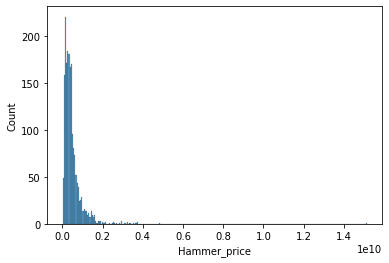

In [ ]:
sns.histplot(s1['Hammer_price'])

<AxesSubplot:xlabel='Minimum_sales_price', ylabel='Count'>

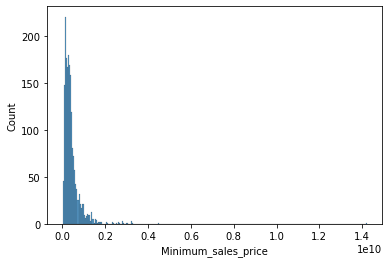

In [ ]:
sns.histplot(s1['Minimum_sales_price'])

In [ ]:
s1.corr()['Hammer_price'].sort_values()

Auction_key                   -0.418769
point.x                       -0.296312
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
addr_bunji2                   -0.003641
addr_bunji1                   -0.003139
road_bunji1                    0.020404
Total_land_gross_area          0.070466
Current_floor                  0.198013
road_bunji2                    0.206681
Total_floor                    0.220830
Claim_price                    0.267728
point.y                        0.295698
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

In [ ]:
tmp = s1[['Total_land_real_area', 'Total_land_auction_area',
          'Total_building_area', 'Total_building_auction_area',
          'Total_appraisal_price', 'Minimum_sales_price',
         'Hammer_price']]

In [ ]:
tmp.head()

,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Hammer_price
0,37.35,37.35,181.77,181.77,836000000,668800000,760000000
1,18.76,18.76,118.38,118.38,1073000000,858400000,971889999
2,71.00,71.00,49.94,49.94,119000000,76160000,93399999
3,32.98,32.98,84.91,84.91,288400000,230720000,256899000
4,45.18,45.18,84.96,84.96,170000000,136000000,158660000


<AxesSubplot:>

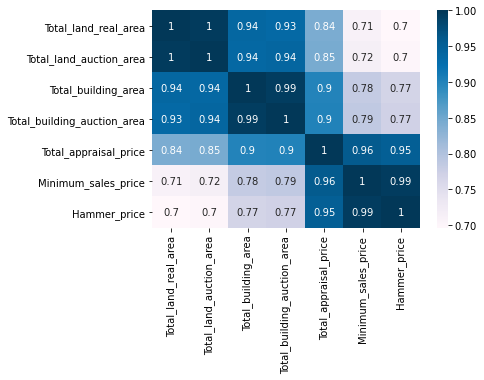

In [ ]:
colormap = plt.cm.PuBu
sns.heatmap(tmp.corr(), cmap = colormap, linecolor = "white", annot = True,)

In [ ]:
s1['real']=s1['Hammer_price']/s1['Minimum_sales_price']

In [ ]:
s1.corr()['real'].sort_values()

Auction_key                   -0.062281
Current_floor                 -0.055320
Total_floor                   -0.051261
Minimum_sales_price           -0.043354
point.x                       -0.039228
road_bunji1                   -0.021403
Total_building_area           -0.003254
addr_bunji2                   -0.002527
Total_building_auction_area   -0.001822
Total_appraisal_price         -0.000727
Total_land_gross_area          0.007116
Total_land_real_area           0.008682
Total_land_auction_area        0.009340
addr_bunji1                    0.013124
Hammer_price                   0.030511
point.y                        0.038030
road_bunji2                    0.047078
Claim_price                    0.100713
Auction_count                  0.354610
Auction_miscarriage_count      0.380068
real                           1.000000
Name: real, dtype: float64

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='real', ylabel='Density'>

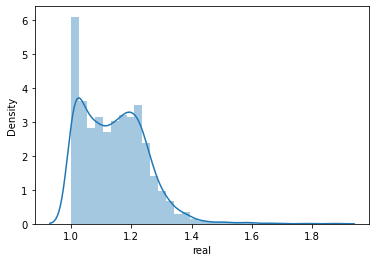

In [ ]:
sns.distplot(s1['real'])

## 위치에 따른 낙찰 가격 상승 정도

<AxesSubplot:title={'center':'pos Area'}, xlabel='x', ylabel='y'>

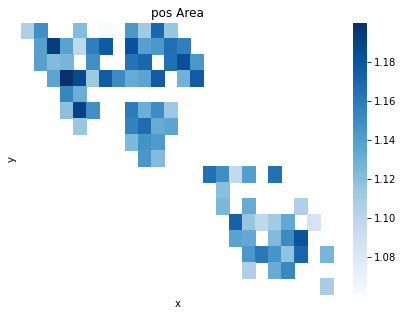

In [ ]:
cop=s1.copy()
cop['x']=pd.cut(s1['point.x'],100)
cop['y']=pd.cut(s1['point.y'],100)
cop1=cop.groupby(['x','y']).size().reset_index(name='count')
cop2=cop.groupby(['x','y'])['real'].mean().reset_index(name='real')
cop=pd.merge(cop1,cop2,on=['x','y'],how='left')

cop=cop.loc[cop['count']>=9]
area = cop.pivot("y", "x", "real")
plt.subplots(1, 1, figsize=(7, 5))
plt.title("pos Area")
sns.heatmap(area, annot=False, xticklabels=False, yticklabels=False,cmap="Blues")

In [ ]:
cop['x']=pd.cut(s1['point.x'],100)
len(cop['x'].unique())

5

In [ ]:
s2 = pd.read_csv('res/'+fl[2])
s2.head()

,Auction_key,Auction_seq,Regist_type,Regist_class,Regist_date,Creditor,Regist_price
0,1,10001,집합건물등기,소유이전,20050715,Private,0
1,1,10002,집합건물등기,가압,20050914,푸른이상호저축은행,860547945
2,1,10003,집합건물등기,가압,20051229,Private,189800000
3,1,10004,집합건물등기,가압,20060428,Private,1346000000
4,1,10005,집합건물등기,가처분,20070410,Private,0


In [ ]:
t

In [ ]:
s2['Auction_key'].unique()

array([   1,    2,    3, ..., 2760, 2761, 2762], dtype=int64)

In [ ]:
pd.read_csv('res/'+fl[3]).head(2)

,Auctiuon_key,Rent_class,Purpose_use,Occupied_part,Rent_date,Rent_deposit,Rent_monthly_price,Specific
0,1,전입,주거,201호전부,2007-09-14 00:00:00,53000000,250000,점유: 2007.09.14-\r\n조사서상:5300만
1,2,전입,주거,방3,2008-06-27 00:00:00,60000000,0,점유: 2005.09.12-


In [ ]:
pd.read_csv('res/'+fl[4]).head(2)

,Auction_key,Auction_seq,Auction_date,Appraisal_price,Minimum_sales_price,Auction_results
0,1,1,2011-06-21 00:00:00,313000000,313000000,변경
1,1,2,2011-12-13 00:00:00,313000000,313000000,변경
